<a href="https://colab.research.google.com/github/marcioshochi/data-scientist-trainning/blob/master/treinamentoMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv"
filmes = pd.read_csv(url)
filmes.columns = ["filme_id", "titulo", "generos"]
filmes.head(10)

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [3]:
generos = filmes.generos.str.get_dummies()
generos.head(10)

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [4]:
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados.shape

(9742, 20)

In [0]:
from sklearn.cluster import KMeans

In [7]:
# Agrupando dados em cluster em 3
# K-Means utiliza o conceito de centroides para agrupar os dados
modelo = KMeans(n_clusters= 3)
modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
print("grupos {}".format(modelo.labels_))

grupos [1 1 2 ... 2 1 2]


In [9]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.72502833  0.22285947 -0.23437551 -0.26770046 -0.528631
   0.49792384 -0.21582032 -0.15856189  0.01700491  0.18877302  0.41681122
   0.1515014  -0.18079921  0.42916243 -0.33587101  0.5125488   1.13520605
  -0.07344215 -0.05195364]
 [-0.05917995 -0.03446078  0.88230849  2.27313203  2.48589701  0.22329199
  -0.31713885 -0.20233074 -0.59215251  0.86578608 -0.09492563 -0.27120494
   0.24542573  0.38249221 -0.12957134 -0.27536325  0.11907215 -0.47269872
  -0.169583   -0.08356119]
 [ 0.03847098 -0.34872385 -0.25131937 -0.25239185 -0.27045122  0.22227357
  -0.19212008  0.13812039  0.17306443 -0.14806119 -0.07692175 -0.15989872
  -0.11364706  0.02660749 -0.18879609  0.208572   -0.26967803 -0.47841931
   

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f59ab62c9b0>,
      dtype=object)

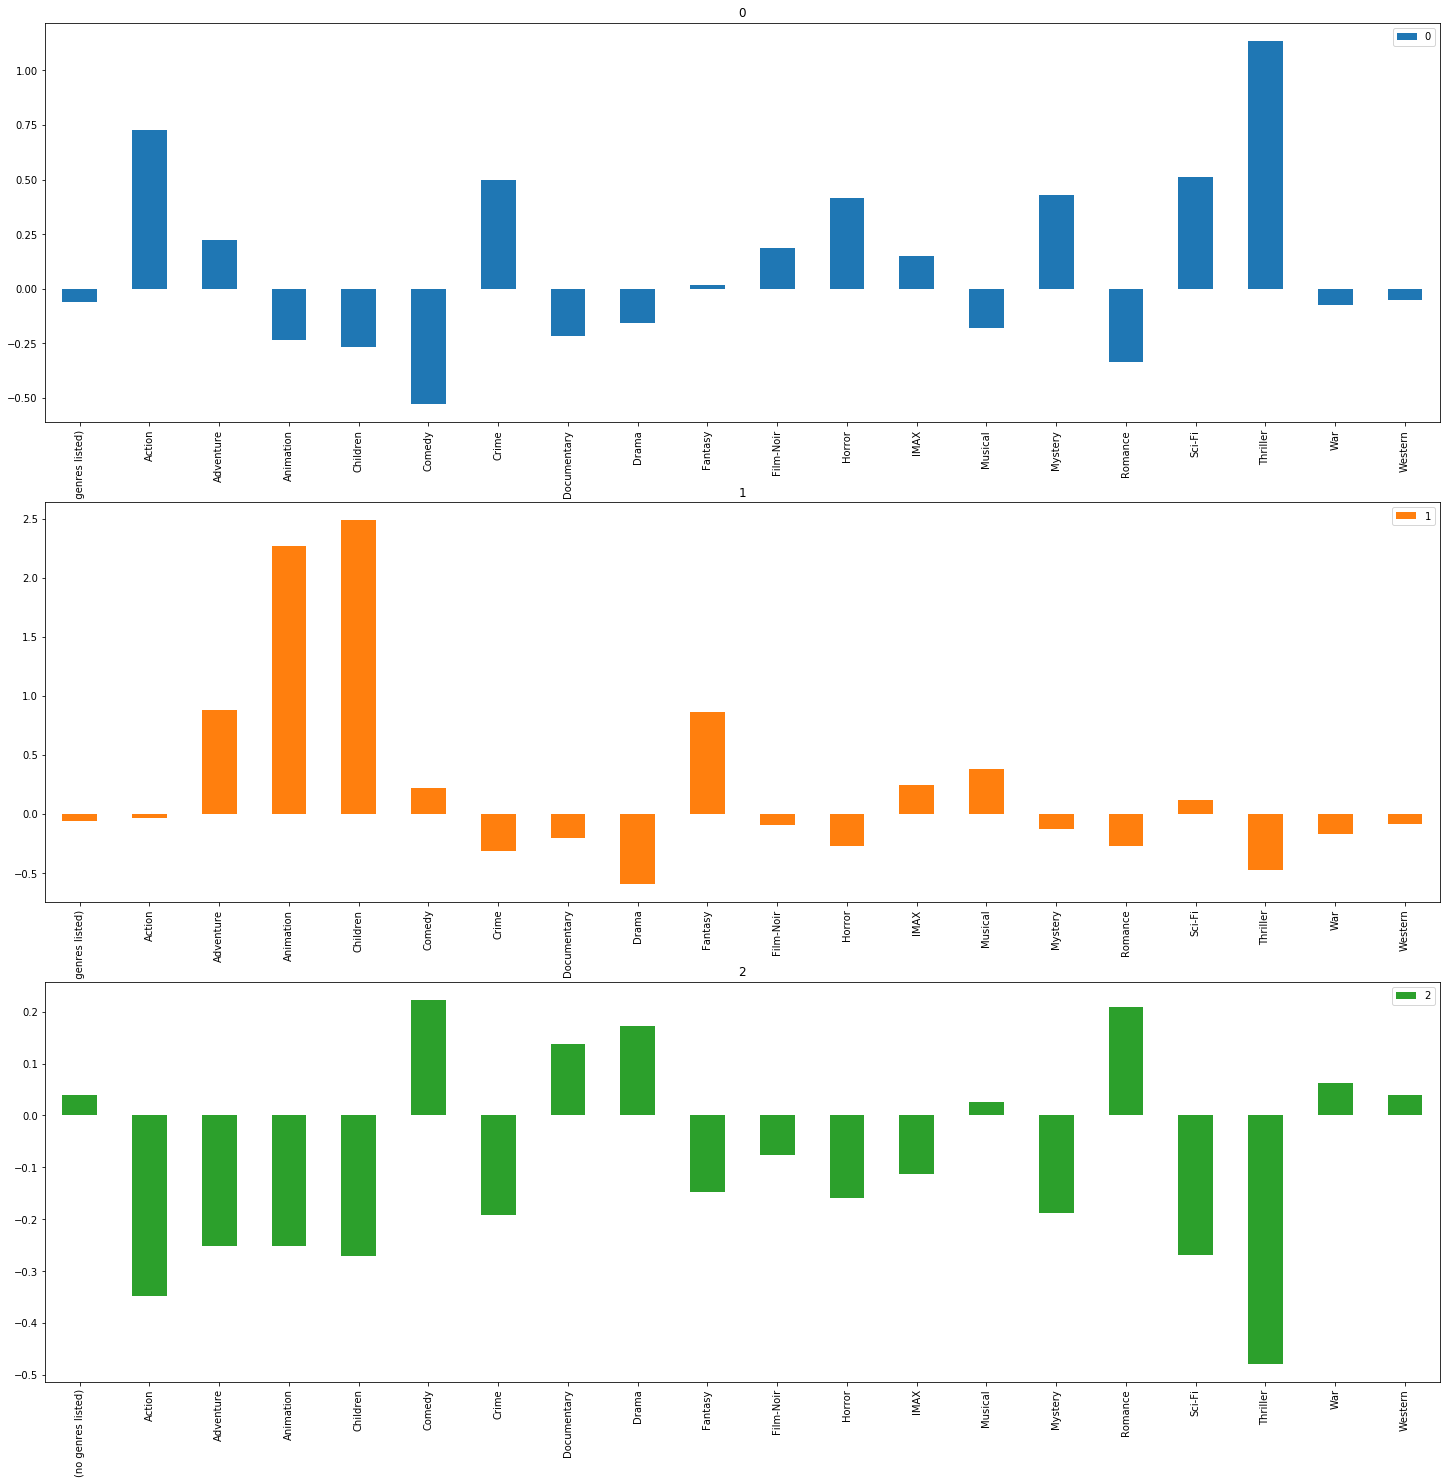

In [10]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns = generos.columns)
grupos.transpose().plot.bar(subplots=True, figsize=(25, 25), sharex=False)

In [11]:
#Transforma colunas em linhas.
grupos.transpose()

,0,1,2
(no genres listed),-0.059180,-0.059180,0.038471
Action,0.725028,-0.034461,-0.348724
Adventure,0.222859,0.882308,-0.251319
Animation,-0.234376,2.273132,-0.252392
Children,-0.267700,2.485897,-0.270451
Comedy,-0.528631,0.223292,0.222274
Crime,0.497924,-0.317139,-0.192120
Documentary,-0.215820,-0.202331,0.138120
Drama,-0.158562,-0.592153,0.173064
Fantasy,0.017005,0.865786,-0.148061


In [12]:
# Filtra por Grupo 
grupos = 0
filtro = modelo.labels_ == grupos
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5701,27793,Starship Troopers 2: Hero of the Federation (2...,Action|Horror|Sci-Fi|War,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
8491,113350,I'll Follow You Down (2013),Drama|Mystery|Sci-Fi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
6244,46723,Babel (2006),Drama|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3798,5312,Murder by Numbers (2002),Crime|Thriller,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
325,367,"Mask, The (1994)",Action|Comedy|Crime|Fantasy,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2788,3729,Shaft (1971),Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2787,3728,One False Move (1992),Crime|Drama|Film-Noir|Thriller,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
8711,124859,The Gambler (2014),Crime|Drama|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
7164,71838,Law Abiding Citizen (2009),Drama|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
6683,58078,"Air I Breathe, The (2007)",Crime|Drama|Romance|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0


In [0]:
# criando algoritimo para reducao para criar grafico de grupo
from sklearn.manifold import TSNE

In [0]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)

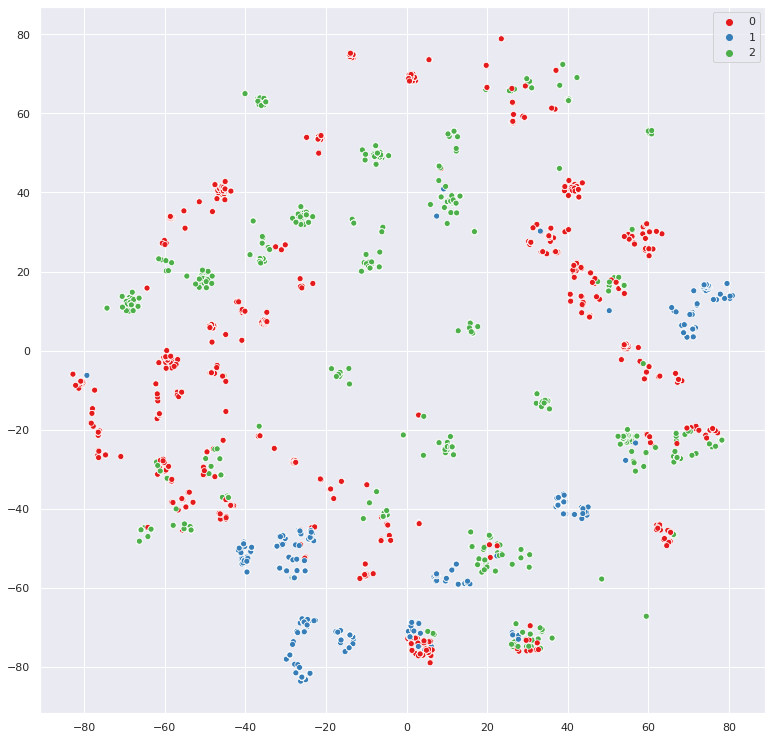

In [20]:
# usando seaborn para gera grafico scatteprlot e reajustando tamanho da trupa
import seaborn as sns
sns.set(rc={'figure.figsize': (13, 13)})
sns.scatterplot(
    x=visualizacao[:, 0], 
    y=visualizacao[:,1],
    hue=modelo.labels_,
    palette=sns.color_palette('Set1', 3)
    )